In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")


In [22]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [23]:
print(df.head()) 

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [24]:
# Assuming 'Annual Income' and 'Spending Score' are relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [25]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Perform K-means clustering
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)


,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [27]:
# Add the 'Cluster' column to the DataFrame
df['Cluster'] = kmeans.labels_

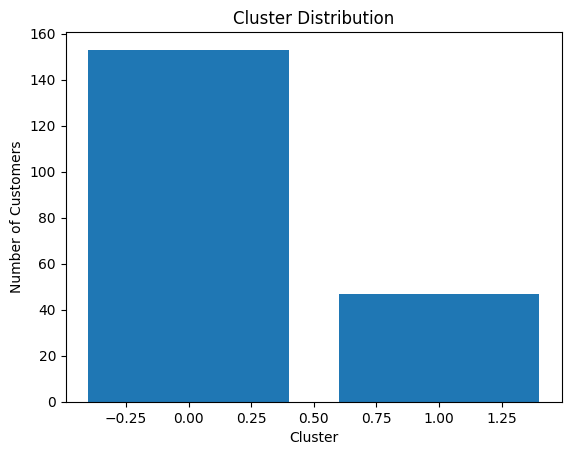

In [28]:
# Cluster Distribution Plot
cluster_counts = df.groupby('Cluster')['CustomerID'].count()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distribution')
plt.show()

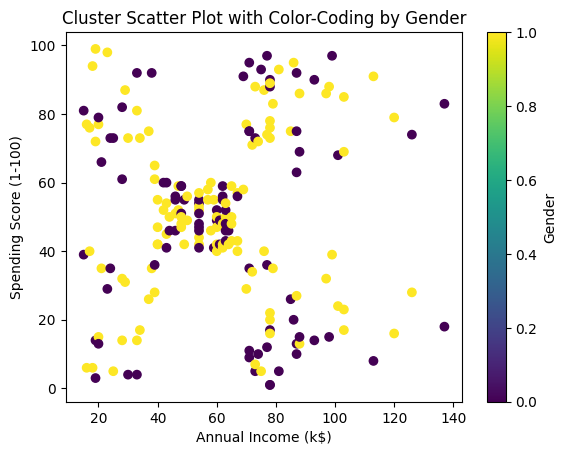

In [29]:
# Plot cluster scatter plot with color-coding by gender
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Gender'].map({'Male': 0, 'Female': 1}), cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Scatter Plot with Color-Coding by Gender')
plt.colorbar(label='Gender')
plt.show()

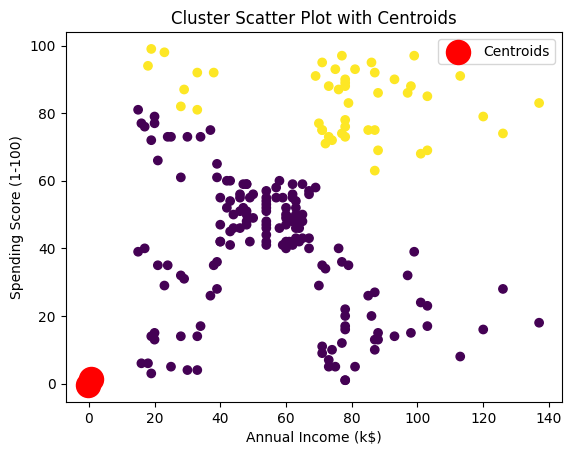

In [30]:
# Plot cluster scatter plot with centroids
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Scatter Plot with Centroids')
plt.legend()
plt.show()

In [ ]:
# Plot cluster boxplot comparison
plt.figure(figsize=(5, 5))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.title('Cluster Boxplot: Annual Income')
plt.show()

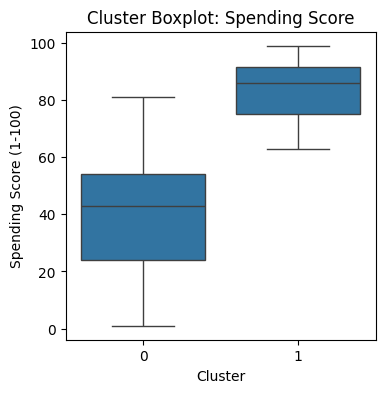

In [40]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Boxplot: Spending Score')
plt.show()

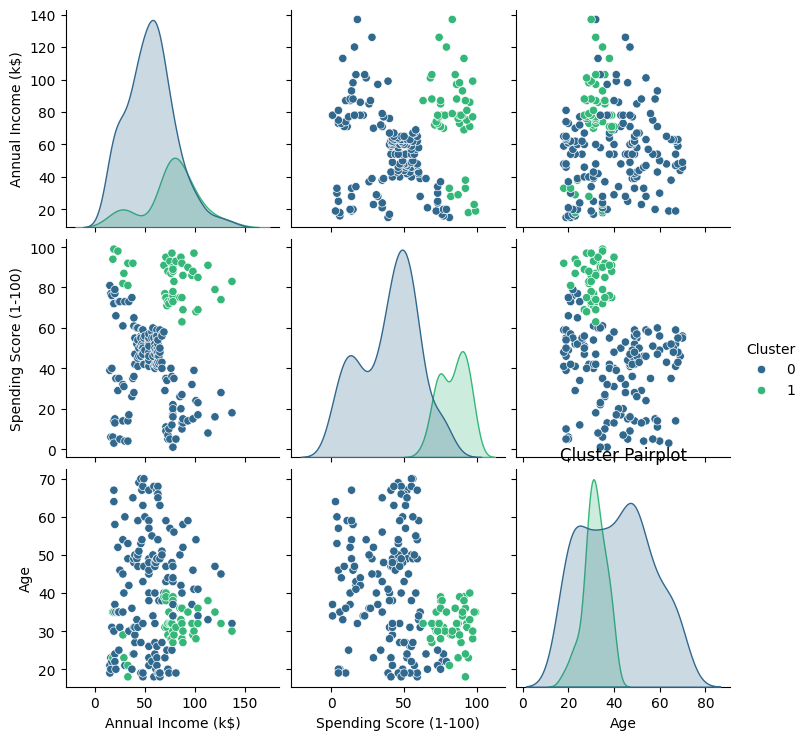

In [33]:
# Plot cluster pairplot
sns.pairplot(df, hue='Cluster', vars=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'], palette='viridis')
plt.title('Cluster Pairplot')
plt.show()

In [34]:
# Calculate average feature values by cluster
cluster_means = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()

In [35]:
# Plot cluster radar chart
labels = np.array(['Annual Income', 'Spending Score', 'Age'])
stats_cluster_0 = cluster_means.loc[cluster_means.index[0]].values
stats_cluster_0 = np.concatenate((stats_cluster_0, [stats_cluster_0[0]]))  # Close the loop
stats_cluster_1 = cluster_means.loc[cluster_means.index[1]].values
stats_cluster_1 = np.concatenate((stats_cluster_1, [stats_cluster_1[0]]))  # Close the loop

In [36]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Add the first angle at the end to close the loop

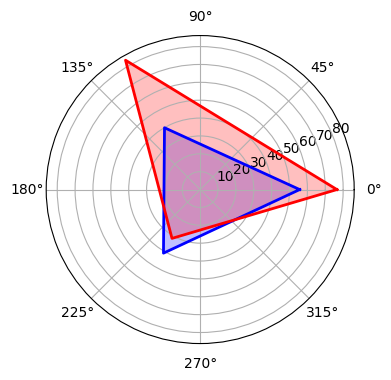

In [38]:
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
ax.fill(angles, stats_cluster_0, color='b', alpha=0.25)
ax.plot(angles, stats_cluster_0, color='b', linewidth=2, label='Cluster 0')
ax.fill(angles, stats_cluster_1, color='r', alpha=0.25)
ax.plot(angles, stats_cluster_1, color='r', linewidth=2, label='Cluster 1')